<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_out_2020/blob/main/PSD_USA_ROTINAS_out_05_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd

In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 2.7MB/s 


In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 280 (delta 11), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (280/280), 77.76 MiB | 43.18 MiB/s, done.
Resolving deltas: 100% (134/134), done.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/marquesgabi/Doutorado
# %cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
df=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [df, df_new]
  df= pd.concat(frames, ignore_index=True)

Cloning into 'Doutorado'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 280 (delta 11), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (280/280), 77.76 MiB | 42.46 MiB/s, done.
Resolving deltas: 100% (134/134), done.


In [8]:
!git clone https://github.com/ucfilho/marquesgabi_set_2020
%cd marquesgabi_set_2020

Cloning into 'marquesgabi_set_2020'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 266 (delta 44), reused 0 (delta 0), pack-reused 194
Receiving objects: 100% (266/266), 7.00 MiB | 16.87 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/content/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020


In [9]:
from big_segment import Segmenta  # got image provided segmented
from ANN_FIND_GRAIN import AnnGrain  # got image provided segmented
from psd_mahotas import Mahotas

In [10]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
ANN_dat=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [ANN_dat, df_new]
  ANN_dat= pd.concat(frames, ignore_index=True)

Cloning into 'Doutorado'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 280 (delta 11), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (280/280), 77.76 MiB | 42.90 MiB/s, done.
Resolving deltas: 100% (134/134), done.
/content/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/Doutorado


In [11]:
df=Segmenta(img)


In [12]:
print(df)

    Width           0           1  ...         781         782         783
0     137   40.592094   47.742500  ...   36.142632   37.268101   41.754436
1     129  186.937378  215.272598  ...   68.633858   73.017494   74.878914
2     188  111.946129  110.377998  ...  112.802628  106.718422  104.808960
3     120   62.426666   61.070004  ...   65.778893   75.391113   82.170006
4     154   48.487610   65.826447  ...   35.851246   33.000004   34.388432
..    ...         ...         ...  ...         ...         ...         ...
45    118  100.462517  104.747490  ...   80.941971   65.460503   41.446712
46    124   48.675339   40.224766  ...    7.571280    0.913632    0.031217
47    134  108.924484   83.594566  ...    0.000000    0.000000    0.000000
48    163   49.953747   52.625652  ...   67.517632   59.541348   60.635704
49    102   93.710121   98.797401  ...    0.209919    0.000000    0.000000

[150 rows x 785 columns]


In [13]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 


Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 3.4623 - accuracy: 0.4752
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 2.1755 - accuracy: 0.5160
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 3.1571 - accuracy: 0.4956
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 4.1648 - accuracy: 0.4956
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 3.8146 - accuracy: 0.4956
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 2.9237 - accuracy: 0.4956
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 1.7738 - accuracy: 0.4956
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 0.7540 - accuracy: 0.5481
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 0.7023 - accuracy: 0.8047
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 0.6362 - accuracy: 0.5394
Epoch 11/

In [14]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 


Epoch 1/200
11/11 [==============================] - 0s 3ms/step - loss: 8.0582 - accuracy: 0.4781
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 3.8076 - accuracy: 0.4956
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 1.6334 - accuracy: 0.5131
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 3.3075 - accuracy: 0.5160
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 4.1536 - accuracy: 0.4956
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 4.4812 - accuracy: 0.4956
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 4.0585 - accuracy: 0.4956
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 3.3769 - accuracy: 0.4956
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 2.5874 - accuracy: 0.4956
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 1.7801 - accuracy: 0.4956
Epoch 11/

In [15]:
#print(confusion_matrix)

In [16]:
#print(METRICS)

In [17]:
#print(y_pred.ravel())

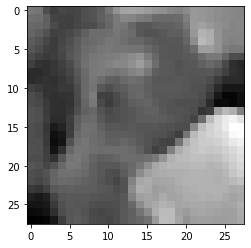

In [18]:
Size=28
qual_img=8
data=np.array(df.drop('Width',axis=1).iloc[qual_img]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)
img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")

In [19]:
Escolha=['ASM', 'constrast', 'correl', 'variance', 'inv diff mom', 'sum aveg', 
         'sum var', 'sum entropy', 'entropy', 'dif var', 'dif entropy', 
         'IMC1', 'IMC2']

Prop=Escolha[1] 

In [20]:
Width_All=df['Width']
df=df.drop('Width',axis=1)
#df_mahotas=Mahotas(Prop,df,Width_All)
Features_Total=Mahotas(Prop,df,Width_All)
print(Features_Total)

     N_peaks  Media_proem          Area  ...       Mode        Mean          Sd
0          2    29.497917   1615.118490  ...   5.318750   69.078776   56.521457
1          2    48.351042   2483.107292  ...  10.484375  106.530078   65.064891
2          2    46.305208   3047.767969  ...   8.475000  138.158594   97.582432
3          2    26.173438   1974.908854  ...  26.840625   86.293229   47.910707
4          3   183.659375  14338.945052  ...  11.043750  629.430859  606.466332
..       ...          ...           ...  ...        ...         ...         ...
145        4    11.179948   1926.137760  ...   5.068750  107.861719  194.741731
146        3     8.731597   1067.719792  ...   2.506250   87.034896  344.470446
147        2   104.229687  10668.289844  ...  27.187500  490.155859  647.829475
148        4    52.359896   2888.112500  ...  12.534375  122.767448  189.800185
149        2   154.648958   9162.391406  ...   0.293750  381.314063  273.989263

[150 rows x 10 columns]


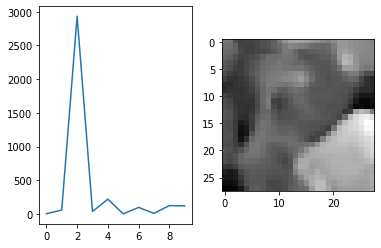

In [27]:
rows=1;cols=2
k=8
img28_all=pd.DataFrame(np.array(Features_Total))
plt.subplot(rows,cols,1)
plt.plot(img28_all.iloc[k])
Foto=np.array(df.iloc[k]).reshape(28,28)
plt.subplot(rows,cols,2)
plt.imshow(Foto, cmap = "gray")

In [32]:
Features_Total.shape

(150, 10)

In [28]:
img28_all.iloc[8,:]

0       3.000000
1      58.286458
2    2932.946354
3      36.808269
4     220.154687
5       0.645487
6      97.331250
7       9.184375
8     124.470703
9     119.657967
Name: 8, dtype: float64

In [31]:
img28_all.shape

(150, 10)